This is my preprocessing and model training notebook

In [192]:
"""Import Libraries"""

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from math import radians
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [193]:
"""This is a function to load the dataset"""

def load_dataset():
    dataset = '../../data/properties_filtered.csv'
    df = pd.read_csv(dataset)
    return df

In [194]:
"""This is a function to define the categorical features and run them through OneHotEncoder"""

def ohe_data(df):
    ##Declare type feature
    column_type = df['type'].values
    ##Declare categorical features
    columns_ohe = ['province', 'district', 'postalCode', 'heatingType']
    ##Run OneHotEncoder
    ohe = OneHotEncoder()
    cat_ohe = ohe.fit_transform(df[columns_ohe]).toarray()
    ##Stack type with other categorical features
    cat_data = np.column_stack((column_type, cat_ohe))
    return cat_data

In [195]:
"""This is a function to define numerical features only"""

def num_data(df):
    ##Declare non-categorical features
    columns_non_cat = ['latitude', 'longitude', 'constructionYear', 'buildingCondition', 'numberOfFrontages', 'livingArea', 'kitchenType', 'bedrooms', 'bedroom1Surface',
    'bedroom2Surface', 'bathrooms', 'toilets', 'energyConsumption', 'energyClass']
    non_cat = df[columns_non_cat].values
    return non_cat

In [196]:
"""This is a function to merge categorical data run through OneHotEncoder with the numerical features"""

def merge_data(df, cat_data):
    ##Declare non-categorical features
    columns_non_cat = ['latitude', 'longitude', 'constructionYear', 'buildingCondition', 'numberOfFrontages', 'livingArea', 'kitchenType', 'bedrooms', 'bedroom1Surface',
    'bedroom2Surface', 'bathrooms', 'toilets', 'energyConsumption', 'energyClass']
    non_cat = df[columns_non_cat].values
    ##Stack categorical and non-categorical features together
    X = np.column_stack((cat_data, non_cat))
    return X

In [197]:
"""This is a function to split the dataset into train and test sets""" 

def split_data(X, y):
    ##Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    return X_train, X_test, y_train, y_test

In [198]:
"""This is a function to scale the features"""

def scale_data(X_train, X_test):
    ##Declare instance of scaler
    sc = MinMaxScaler()
    ##Fit and transform data
    X_train = sc.fit_transform(X_train)
    X_test = sc.fit_transform(X_test)
    return X_train, X_test

In [219]:
"""This is a function to declare a linear regression model then fit and evaluate it"""

def model_data_linear(X_train, X_test, y_train, y_test):
    ##Declare instance of model
    regressor = LinearRegression()
    ##Fit the model
    regressor.fit(X_train, y_train)
    train_score = regressor.score(X_train, y_train)
    ##Evaluate the model
    y_predict = regressor.predict(X_test)
    test_score = regressor.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_predict)
    mae = mean_absolute_error(y_test, y_predict)
    print(f'train score is {train_score:.5f}, test score is {test_score:.5f}')
    print(f'mean squared error is {mse:.2f}, mean absolute error is {mae:.2f}')
    return y_predict

In [220]:
"""This is a function to declare a linear regression model, fit the polynomial features and evalaute it"""

def model_data_polynomial(X_train, X_test, y_train, y_test):
    ##Fit polynomial regression to the dataset
    poly = PolynomialFeatures(degree = 2, include_bias=False)
    train_poly = poly.fit_transform(X_train)
    test_poly = poly.fit_transform(X_test)
    poly.fit(train_poly, y_train)
    ##Declare instance of model
    regressor = LinearRegression()
    regressor.fit(train_poly, y_train)
    train_score = regressor.score(train_poly, y_train)
    ##Evaluate the model
    y_predict = regressor.predict(test_poly)
    test_score = regressor.score(test_poly, y_test)
    mse = mean_squared_error(y_test, y_predict)
    mae = mean_absolute_error(y_test, y_predict)
    print(f'train score is {train_score:.5f}, test score is {test_score:.5f}')
    print(f'mean squared error is {mse:.2f}, mean absolute error is {mae:.2f}')
    return y_predict

In [221]:
"""This is a function to declare a logistic regression model then fit and evaluate it"""

def model_data_logistic(X_train, X_test, y_train, y_test):
    ##Declare instance of model
    regressor = LogisticRegression(solver='liblinear')
    ##Fit the model
    regressor.fit(X_train, y_train)
    train_score = regressor.score(X_train, y_train)
    ##Evaluate the model
    y_predict = regressor.predict(X_test)
    test_score = regressor.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_predict)
    mae = mean_absolute_error(y_test, y_predict)
    print(f'train score is {train_score:.5f}, test score is {test_score:.5f}')
    print(f'mean squared error is {mse:.2f}, mean absolute error is {mae:.2f}')
    return y_predict

In [222]:
"""This is a function to declare a KNN regression model then fit and evaluate it"""

def model_data_knn(X_train, X_test, y_train, y_test):
    ##Declare instance of model
    regressor = KNeighborsRegressor()
    ##Fit the model
    regressor.fit(X_train, y_train)
    train_score = regressor.score(X_train, y_train)
    ##Evaluate the model
    y_predict = regressor.predict(X_test)
    test_score = regressor.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_predict)
    mae = mean_absolute_error(y_test, y_predict)
    print(f'train score is {train_score:.5f}, test score is {test_score:.5f}')
    print(f'mean squared error is {mse:.2f}, mean absolute error is {mae:.2f}')
    return y_predict

In [223]:
"""This is a function to declare a random forest regression model then fit and evaluate it"""

def model_data_random_forest(X_train, X_test, y_train, y_test):
    ##Declare instance of model
    regressor = RandomForestRegressor(n_estimators= 100, random_state= 0)
    ##Fit the model
    regressor.fit(X_train, y_train)
    train_score = regressor.score(X_train, y_train)
    ##Evaluate the model
    y_predict = regressor.predict(X_test)
    test_score = regressor.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_predict)
    mae = mean_absolute_error(y_test, y_predict)
    print(f'train score is {train_score:.5f}, test score is {test_score:.5f}')
    print(f'mean squared error is {mse:.2f}, mean absolute error is {mae:.2f}')
    return y_predict

In [224]:
"""This is a function to declare a decision tree regression model then fit and evaluate it"""

def model_data_decision_tree(X_train, X_test, y_train, y_test):
    ##Declare instance of model
    regressor = DecisionTreeRegressor(random_state= 0)
    ##Fit the model
    regressor.fit(X_train, y_train)
    train_score = regressor.score(X_train, y_train)
    ##Evaluate the model
    y_predict = regressor.predict(X_test)
    test_score = regressor.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_predict)
    mae = mean_absolute_error(y_test, y_predict)
    print(f'train score is {train_score:.5f}, test score is {test_score:.5f}')
    print(f'mean squared error is {mse:.2f}, mean absolute error is {mae:.2f}')
    return y_predict

In [205]:
"""This is a function to scatter plot the model prediction"""

def model_plot(y_predict, y_test):
    plt.scatter(y_predict, y_test, color='red')
    plt.xlabel('y_predict')
    plt.ylabel('y_test')
    plt.show()

In [206]:
"""This is a function to run everything on categorical data only"""

def run_model_cat(model_data_name):
    df = load_dataset()
    X = ohe_data(df)
    y = df['price'].values
    X_train, X_test, y_train, y_test = split_data(X,y)
    X_train, X_test = scale_data(X_train, X_test)
    y_predict = model_data_name(X_train, X_test, y_train, y_test)
    model_plot(y_predict, y_test)
    return y_predict

In [207]:
"""This is a function to run everything on non-categorical data only"""

def run_model_non_cat(model_data_name):
    df = load_dataset()
    X = num_data(df)
    y = df['price'].values
    X_train, X_test, y_train, y_test = split_data(X,y)
    X_train, X_test = scale_data(X_train, X_test)
    y_predict = model_data_name(X_train, X_test, y_train, y_test)
    model_plot(y_predict, y_test)
    return y_predict

In [208]:
"""This is a function to run everything on specific non-categorical feature"""

def run_model_feature(model_data_name, column):
    df = load_dataset()
    array = df[column].values
    y = df['price'].values
    X = array.reshape(-1, 1)
    X_train, X_test, y_train, y_test = split_data(X,y)
    X_train, X_test = scale_data(X_train, X_test)
    y_predict = model_data_name(X_train, X_test, y_train, y_test)
    model_plot(y_predict, y_test)
    return y_predict

In [209]:
"""This is a function to run everything on all data"""

def run_model(model_data_name):
    df = load_dataset()
    cat_data = ohe_data(df)
    non_cat_data = num_data(df)
    X = merge_data(df, cat_data)
    y = df['price'].values
    X_train, X_test, y_train, y_test = split_data(X,y)
    X_train, X_test = scale_data(X_train, X_test)
    y_predict = model_data_name(X_train, X_test, y_train, y_test)
    model_plot(y_predict, y_test)
    return y_predict

train score is 0.04082, test score is 0.06266
mean squared error is 245964591220.40, mean absolute error is 275164.33


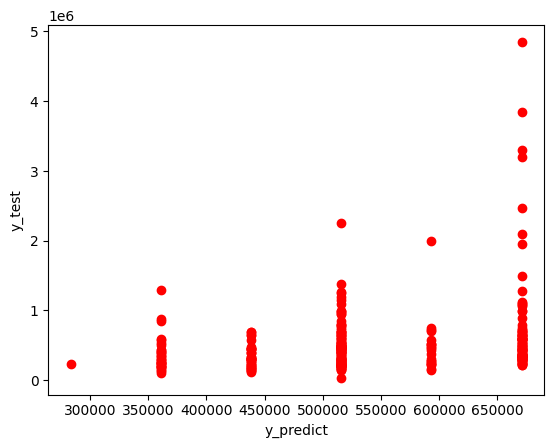

array([515856.35552847, 515856.35552847, 515856.35552847, 670824.72410218,
       670824.72410218, 593340.53981532, 670824.72410218, 438372.17124161,
       593340.53981532, 515856.35552847, 670824.72410218, 360887.98695476,
       515856.35552847, 438372.17124161, 283403.8026679 , 593340.53981532,
       515856.35552847, 515856.35552847, 670824.72410218, 515856.35552847,
       670824.72410218, 515856.35552847, 515856.35552847, 593340.53981532,
       515856.35552847, 515856.35552847, 438372.17124161, 593340.53981532,
       670824.72410218, 438372.17124161, 515856.35552847, 515856.35552847,
       360887.98695476, 438372.17124161, 438372.17124161, 515856.35552847,
       670824.72410218, 515856.35552847, 515856.35552847, 515856.35552847,
       360887.98695476, 670824.72410218, 593340.53981532, 670824.72410218,
       515856.35552847, 593340.53981532, 515856.35552847, 670824.72410218,
       515856.35552847, 670824.72410218, 670824.72410218, 670824.72410218,
       515856.35552847, 4

In [236]:
run_model_feature(model_data_linear, 'buildingCondition')

train score is 0.49713, test score is 0.32584
mean squared error is 176903768419.87, mean absolute error is 222830.04


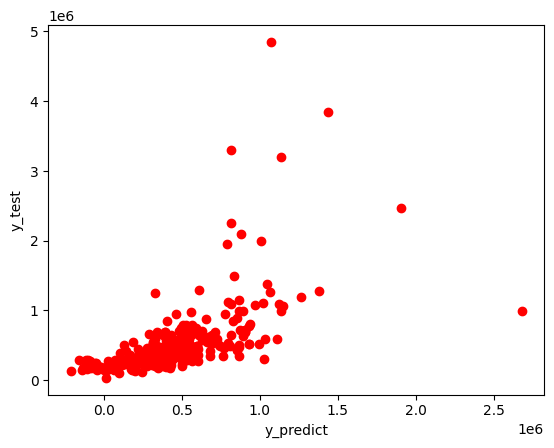

array([ 3.27064205e+05,  4.63600607e+05,  7.68259506e+04,  1.07499911e+06,
        5.31364914e+05,  5.16979669e+05,  4.85693721e+05, -1.67185165e+04,
        3.43539963e+03,  1.81271992e+05,  4.31292683e+05,  2.01485347e+05,
        3.12540377e+05,  4.11320167e+05,  4.56917355e+04,  1.71851334e+05,
        3.34730494e+05,  6.66625814e+05,  3.32482263e+05,  5.92469269e+05,
        6.78021104e+05,  1.37582342e+05,  6.00225334e+05,  1.94814244e+05,
        1.05361663e+05,  8.65206592e+05,  4.13868664e+05,  6.06173385e+05,
        5.78209632e+05,  1.07034569e+05,  1.13892345e+06,  8.64216847e+05,
       -1.03564743e+05, -2.12662930e+05,  5.45543985e+05,  8.07926241e+05,
        4.51921518e+05,  7.76817850e+05,  2.80336261e+04,  8.28663341e+05,
        2.72548845e+05,  3.24626355e+05,  4.95734271e+05,  8.69076911e+05,
        3.76101851e+05,  3.91523551e+05,  3.64555587e+05,  1.03018837e+06,
        9.07134593e+05,  5.55974997e+05,  4.41016315e+05,  7.38389230e+05,
        3.27941413e+05,  

In [237]:
"""Linear Regression"""

run_model_non_cat(model_data_linear)

train score is 0.74699, test score is -0.14641
mean squared error is 300824853696.23, mean absolute error is 361845.84


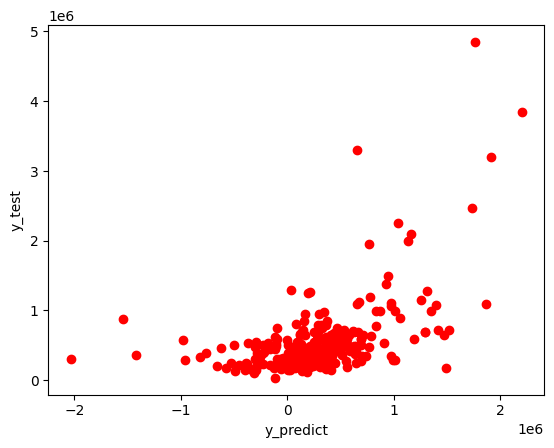

array([ 1.89242850e+05,  1.03084420e+05, -3.81110666e+05,  1.75832111e+06,
        3.21858074e+05,  2.04194724e+05,  4.23881698e+05,  2.03931276e+05,
        1.77301734e+05, -3.91192162e+05,  4.06532297e+05, -4.90868520e+05,
        2.53878171e+05,  1.71497111e+05, -2.32320382e+05,  3.60182866e+05,
        1.25265977e+05, -1.17667710e+05,  2.60997851e+05, -9.55541575e+04,
        5.87568007e+05, -2.72613205e+05,  2.81155120e+05,  4.28003689e+04,
        4.99469496e+05,  7.67354102e+05,  7.13108963e+04,  3.97166882e+04,
        6.44722748e+05,  2.29962217e+05,  1.01415715e+06, -2.27449054e+05,
        5.55413146e+05,  1.41347128e+05,  9.15126215e+04,  2.62244929e+05,
        4.58298310e+05,  1.66621971e+05,  6.92403253e+05,  3.74050879e+05,
        7.41823405e+05,  3.51814849e+05,  4.63996252e+05,  9.71192160e+05,
        1.16758597e+05,  3.57542146e+05,  1.92719552e+05,  1.18534533e+06,
        1.36317945e+05,  2.85991650e+05,  2.38982068e+05,  6.86464891e+05,
        4.89758381e+04,  

In [238]:
"""Polynomial Regression"""

run_model_non_cat(model_data_polynomial)

train score is 0.34343, test score is 0.05705
mean squared error is 242275616262.17, mean absolute error is 248400.79


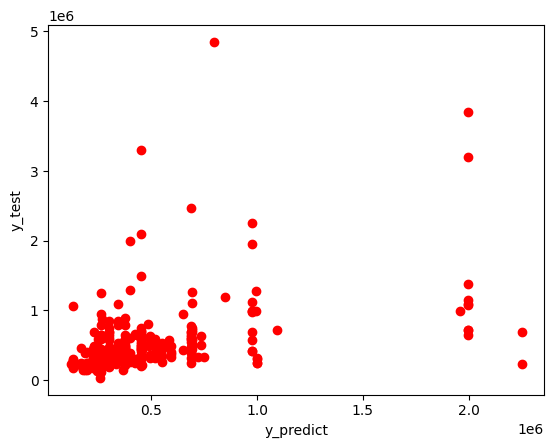

array([ 265000.,  265000.,  120000.,  795000.,  299000.,  245000.,
        299000.,  300000.,  180000.,  199000.,  695000.,  245000.,
        450000.,  169000.,  335000.,  180000.,  359000.,  690000.,
        299000.,  695000.,  375000.,  249000.,  450000., 2250000.,
        189000.,  585000.,  690000.,  245000.,  450000.,  230000.,
        995000.,  245000.,  189000.,  259000.,  299000.,  695000.,
        975000.,  650000.,  425000.,  299000.,  550000.,  265000.,
        450000.,  345000.,  225000.,  458150.,  375000.,  450000.,
        299000.,  345000.,  520000.,  735000.,  295000.,  225000.,
        349500.,  495000., 1960000.,  249000.,  975000.,  690000.,
        690000.,  299000.,  690000.,  650000.,  299000.,  345000.,
        129000.,  180000.,  495000.,  299000.,  259000.,  259000.,
        690000.,  435000.,  129000.,  325000.,  319000.,  525000.,
        299000.,  299000.,  735000.,  435000.,  388000.,  425000.,
        299000.,  259000.,  425000.,  300000., 1995000.,  5950

In [239]:
"""Logistic Regression"""

run_model(model_data_logistic)

train score is 0.63291, test score is 0.41241
mean squared error is 154188078923.79, mean absolute error is 215843.78


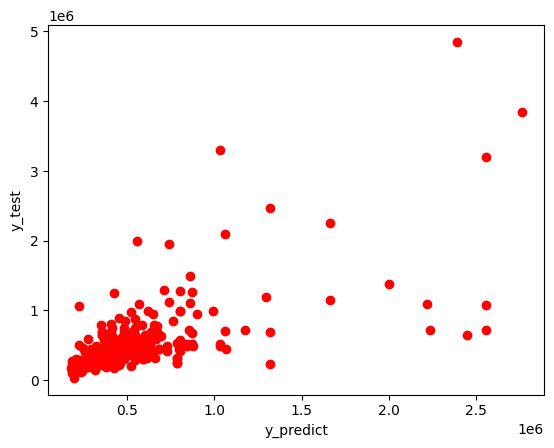

array([ 424800.,  294700.,  271600., 2390000.,  542200.,  350000.,
        349800.,  274000.,  184400.,  190000.,  640200.,  237800.,
        481700.,  247800.,  307400.,  213800.,  361400.,  489600.,
        464200.,  412800.,  469000.,  210000.,  877800., 1322000.,
        274200.,  632000.,  610800.,  227800.,  728590.,  465600.,
        992000.,  220600.,  227400.,  181800.,  357198.,  840800.,
        800200.,  649800.,  377800.,  764400.,  619000.,  544200.,
        481700.,  352800.,  433840.,  458150.,  479600.,  607400.,
        357198.,  308000.,  468800.,  616000.,  377000.,  377800.,
        411600.,  659600.,  617200.,  222400.,  799980.,  564600.,
        602600.,  383800.,  672000.,  506600.,  363800.,  308000.,
        205200.,  181400.,  492000.,  394200.,  181800.,  175600.,
        395000.,  355300.,  223000.,  376400.,  313600.,  505400.,
        285198.,  358800.,  695000.,  355300.,  333600.,  443400.,
        484800.,  181800.,  377800.,  287000., 2450000.,  4650

In [240]:
"""KNN Regression"""

run_model(model_data_knn)

train score is 0.94838, test score is 0.46582
mean squared error is 140172590258.34, mean absolute error is 200686.25


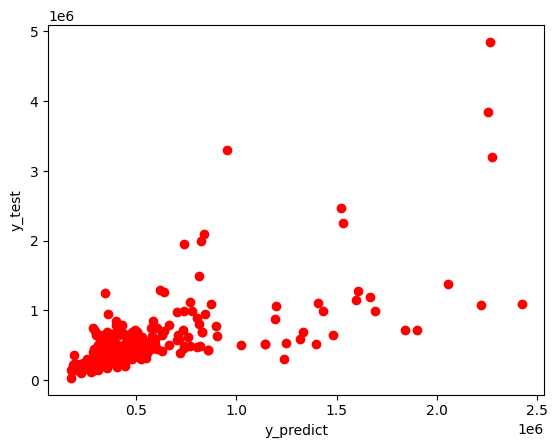

array([ 345995.65      ,  439984.5       ,  191070.        ,
       2265340.        ,  574575.        ,  424695.        ,
        497529.        ,  273295.        ,  277860.        ,
        280350.        ,  380864.        ,  278290.        ,
        338045.        ,  457060.        ,  250800.        ,
        251735.        ,  339707.        ,  757844.        ,
        364059.9       ,  603940.        ,  629237.        ,
        206620.        ,  481210.        ,  280960.        ,
        316340.        ,  576590.        ,  465840.        ,
        407020.        ,  484273.5       ,  287560.        ,
       1430760.        , 1020920.        ,  281910.        ,
        180120.        ,  574700.        ,  768012.        ,
        322771.71666667,  841460.        ,  367825.        ,
        585470.        ,  393234.8       ,  333260.        ,
        286268.        ,  461639.        ,  260597.9       ,
        402756.5       ,  347725.        ,  714360.        ,
        829040.        ,

In [241]:
"""Random Forest Regression"""

run_model(model_data_random_forest)

train score is 0.67014, test score is 0.42390
mean squared error is 151171292976.15, mean absolute error is 225236.99


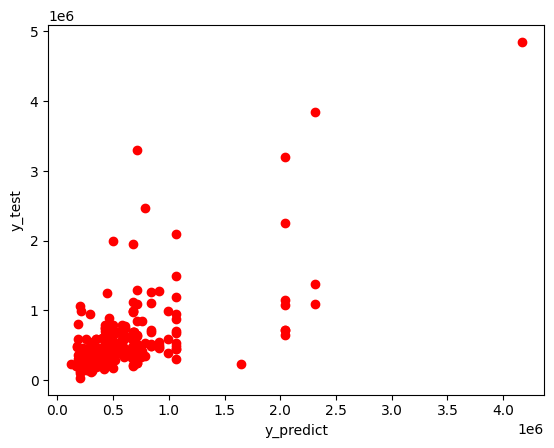

array([ 450000.        ,  265000.        ,  120000.        ,
       4165000.        ,  425653.84615385,  308800.        ,
        288100.        ,  285000.        ,  287500.        ,
        214500.        ,  675868.75      ,  308800.        ,
        431277.77777778,  229000.        ,  335000.        ,
        217000.        ,  388333.33333333,  625000.        ,
        425653.84615385,  610000.        ,  287500.        ,
        214500.        , 1064818.18181818, 1645000.        ,
        256000.        ,  585000.        ,  671250.        ,
        308800.        ,  755983.33333333,  472666.66666667,
        995000.        ,  308800.        ,  256000.        ,
        199500.        ,  549000.        ,  844000.        ,
        675868.75      , 1062687.5       ,  344000.        ,
        761833.33333333,  787500.        ,  499857.14285714,
        431277.77777778,  386208.33333333,  224000.        ,
        441877.08333333,  401666.66666667,  595000.        ,
        549000.        ,

In [242]:
"""Decision Tree Regression"""

run_model_cat(model_data_decision_tree)